<div style="
  background: linear-gradient(90deg, #222e42ff, #d8aee4ff);
  padding: 16px;
  border-radius: 8px;
  color: #ffffff;
  font-family: Arial, sans-serif;
">

  <h2 style="margin: 0 0 8px 0;">
    Pract – 1: Introduction to Python & Libraries
  </h2>

  <p style="margin: 0; font-size: 14px; line-height: 1.5;">
    • Setup Python with NumPy, Pandas, Scikit-Learn<br/>
    • Load dataset & perform basic data manipulation<br/>
    • Build and evaluate a simple Linear Regression model<br/>
    • Plot regression line and assess performance
  </p>

</div>


## Import libraries and load data

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df = pd.read_csv('house_prices_practice.csv')

print("First 5 Rows:")
print(df.head())


First 5 Rows:
   Id  OverallQual  GrLivArea  GarageCars  TotalBsmtSF  YearBuilt  FullBath  \
0   1            7       1560           0         1658       1969         2   
1   2            4       2827           2         1319       2012         3   
2   3            8       3920           0          841       2010         1   
3   4            5       3044           0         1058       1998         0   
4   5            7        801           1         2428       2020         0   

   BedroomAbvGr  LotArea  SalePrice  
0             1     8059     177106  
1             4    13530     301044  
2             4     9010     360609  
3             4    13207     240556  
4             1     9117     193656  


In [12]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            300 non-null    int64
 1   OverallQual   300 non-null    int64
 2   GrLivArea     300 non-null    int64
 3   GarageCars    300 non-null    int64
 4   TotalBsmtSF   300 non-null    int64
 5   YearBuilt     300 non-null    int64
 6   FullBath      300 non-null    int64
 7   BedroomAbvGr  300 non-null    int64
 8   LotArea       300 non-null    int64
 9   SalePrice     300 non-null    int64
dtypes: int64(10)
memory usage: 23.6 KB
None


## Prepare X and y

In [13]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
        'YearBuilt', 'FullBath', 'LotArea', 'BedroomAbvGr']]

y = df['SalePrice']

## Split-train and test data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

## Train the model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Training Completed")


Model Training Completed


## Evaluate the model

In [16]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)



Model Evaluation:
Mean Squared Error: 156386511.4190837
Root Mean Squared Error: 12505.45926462054
R2 Score: 0.9724369952260752


## Compare Actual vs Predicted Values

In [17]:
results = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

print("\nActual vs Predicted Prices:")
print(results.head())


Actual vs Predicted Prices:
     Actual Price  Predicted Price
203        224163    239161.363189
266        203881    190489.667985
152        380236    398000.957463
9          211664    223169.467552
233        122139    135188.395708


## Visualize results

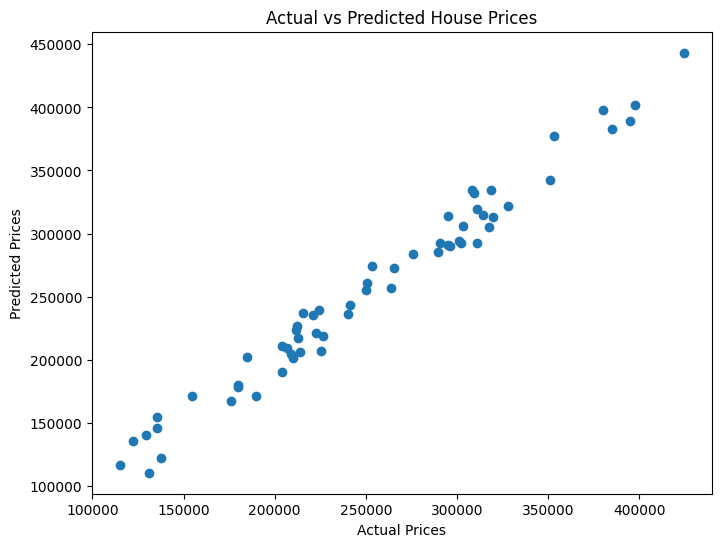

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()